<a href="https://colab.research.google.com/github/rurisana/Section2_project/blob/main/AI_13_%EA%B0%95%EB%8B%A4%EC%98%A8_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 섹션 2 프로젝트
청자 : 비데이터 직군

목표 : 데이터셋을 사용하여 머신러닝 모델을 만든 후 성능 및 인사이트를 도출 / 공유

발표 내용 : 지원한 회사에 사전과제(입사과제)를 받아서 수행, 면접관에게 해당 내용을 설명

====

## 데이터 셋('안전 운전자 예측')

운전자가 보험을 청구할 확률을 예측. 사고를 낼 가능성이 낮은 안전 운전자에게는 낮은 보험료, 사고 가능성이 높은 경우 많은 보험료 청구해야. 정확히 예측해야지 고객에게 불만도가 없을테니 주의

데이터는 포르투 세구로 회사에서 보유한 고객 데이터

데이터는 결측값이 많은 편이기 때문에 문제가 있는 값들을 해결하는게 포인트

타깃의 값은 0과 1로 값이 0이라면 운전자가 보험금을 청구X, 1이면 청구

In [ ]:
import pandas as pd

train = pd.read_csv('/content/train.csv', index_col='id')
test = pd.read_csv('/content/test.csv', index_col='id')
submission = pd.read_csv('/content/sample_submission.csv', index_col='id')

train.shape, test.shape

((595212, 58), (892816, 57))

In [ ]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [ ]:
#0은 청구하지 않은 경우, 1은 청구하는 경우

submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

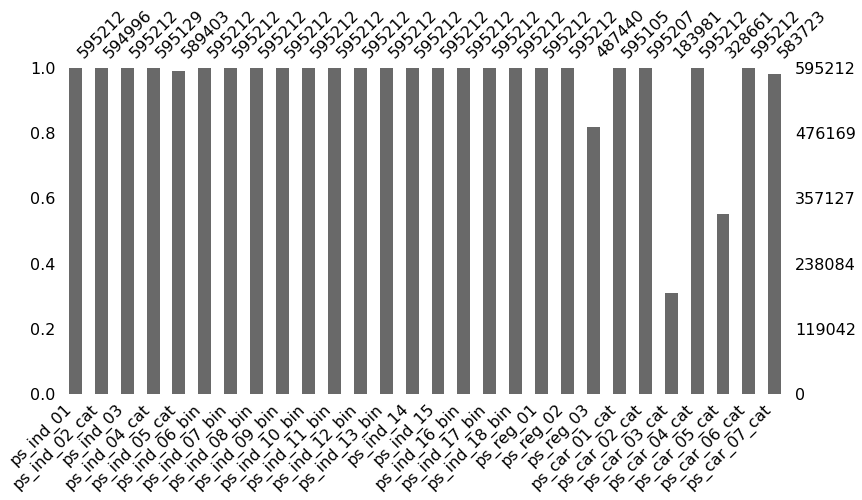

In [ ]:
import numpy as np
import missingno as msno

#결측치 확인
train_copy = train.copy().replace(-1, np.NaN)
msno.bar(df=train_copy.iloc[:,1:29], figsize=(13,6));

#높이가 낮을수록 결측값이 많다는 것.

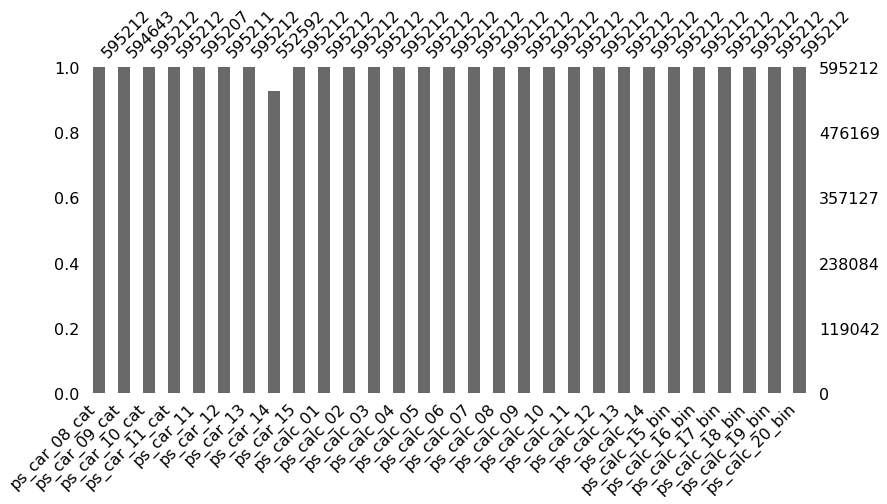

In [ ]:
#나머지 피처들의 결측값
msno.bar(df=train_copy.iloc[:,29:], figsize=(13,6));

In [ ]:
#피처 요약표
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary['결측값 개수'] = (df==-1).sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['데이터 종류'] = None
  for col in df.columns:
    if 'bin' in col or col == 'target':
      summary.loc[col, '데이터 종류'] = '이진형'
    elif 'cat' in col:
      summary.loc[col, '데이터 종류'] = '명목형'
    elif df[col].dtype == float:
      summary.loc[col, '데이터 종류'] = '연속형'
    elif df[col].dtype == int:
      summary.loc[col, '데이터 종류'] = '순서형'

  return summary

In [ ]:
summary = resumetable(train)
summary

데이터셋 형상: (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [ ]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [ ]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

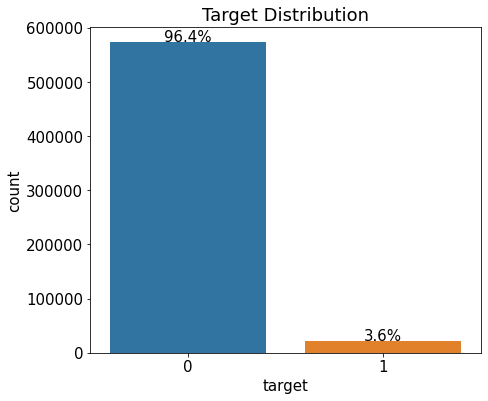

In [ ]:
#타깃값 분포
def write_percent(ax, total_size):
  for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    left_coord = patch.get_x()
    percent = height/total_size*100

    ax.text(left_coord + width/2.0,
            height + total_size*0.001,
            '{:1.1f}%'.format(percent),
            ha='center')
    
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution');

#타깃값이 불균형

In [ ]:
#이진피처

#고윳값별 타깃값의 비율을 구하기

import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12,18)):
  mpl.rc('font', size=9)
  plt.figure(figsize=size)
  grid = gridspec.GridSpec(num_rows, num_cols)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

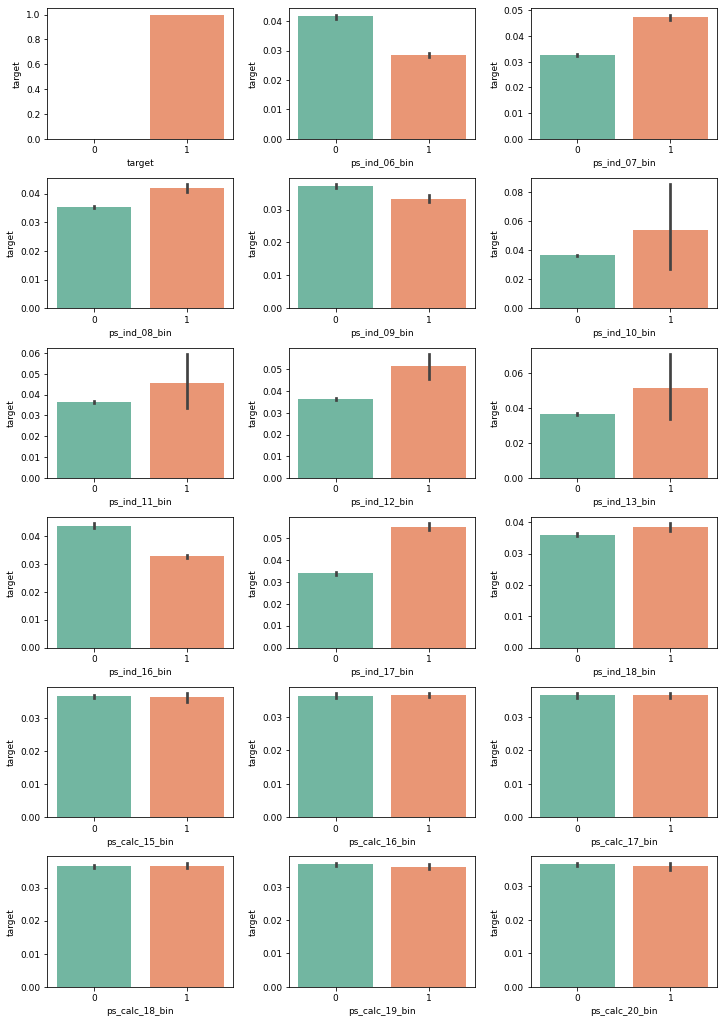

In [ ]:
#이진형 피처

bin_features = summary[summary['데이터 종류'] == '이진형'].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

#10~13번의 경우 신뢰구간이 넓어서 통계적 유효성이 떨어져서 삭제해야 함
#15~20의 경우 고윳값별 타깃값 비율 차이가 없어서 예측력이 없어서 삭제해야 함

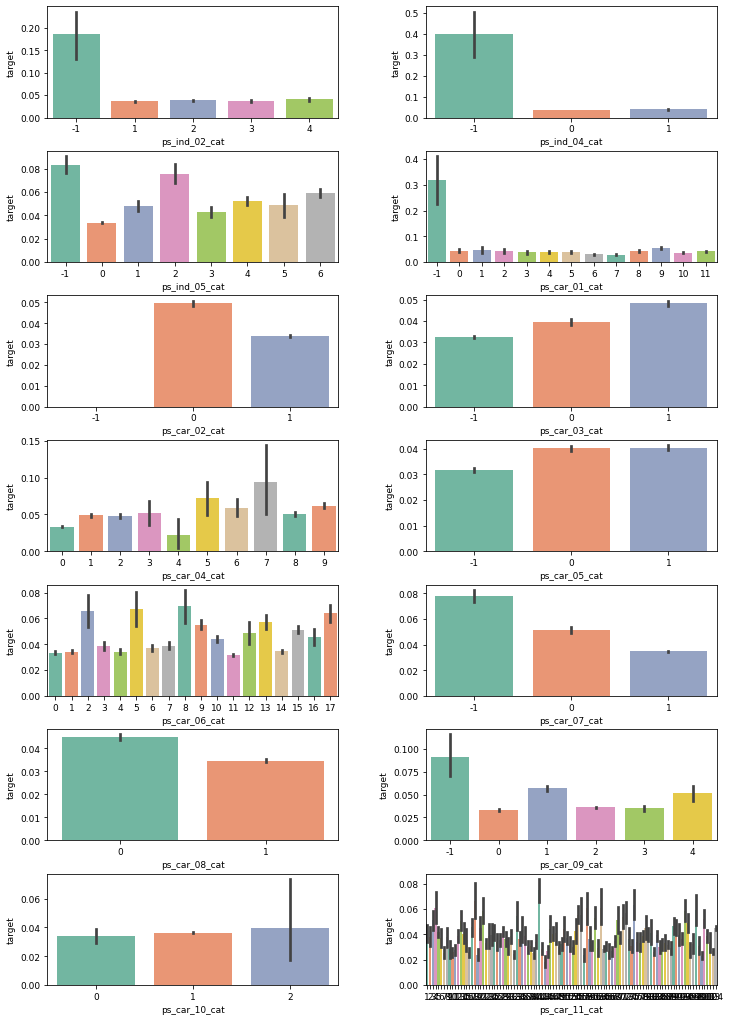

In [ ]:
#명목형 피처

nom_features = summary[summary['데이터 종류']=='명목형'].index
plot_target_ratio_by_features(train, nom_features,7,2)

#-1은 결측값
#보통은 결측값이 많지 않다면 다른 값으로 대체, 많다면 피처 자체를 제거시키지만 결측값 자체가 타깃값 예측에 도움을 주기도 함
#ind_02의 경우 결측값을 다른 값으로 대체시에 모델 성능이 더 나빠질 수 있어서 결측값을 보존시키는 것이 유효할 것으로 판단
#고윳값 간 타깃값 1 비율에 차이가 있으므로 모델링에 필요한 피처로 판단하여 신뢰구간이 넓더라도 제거하지 않음

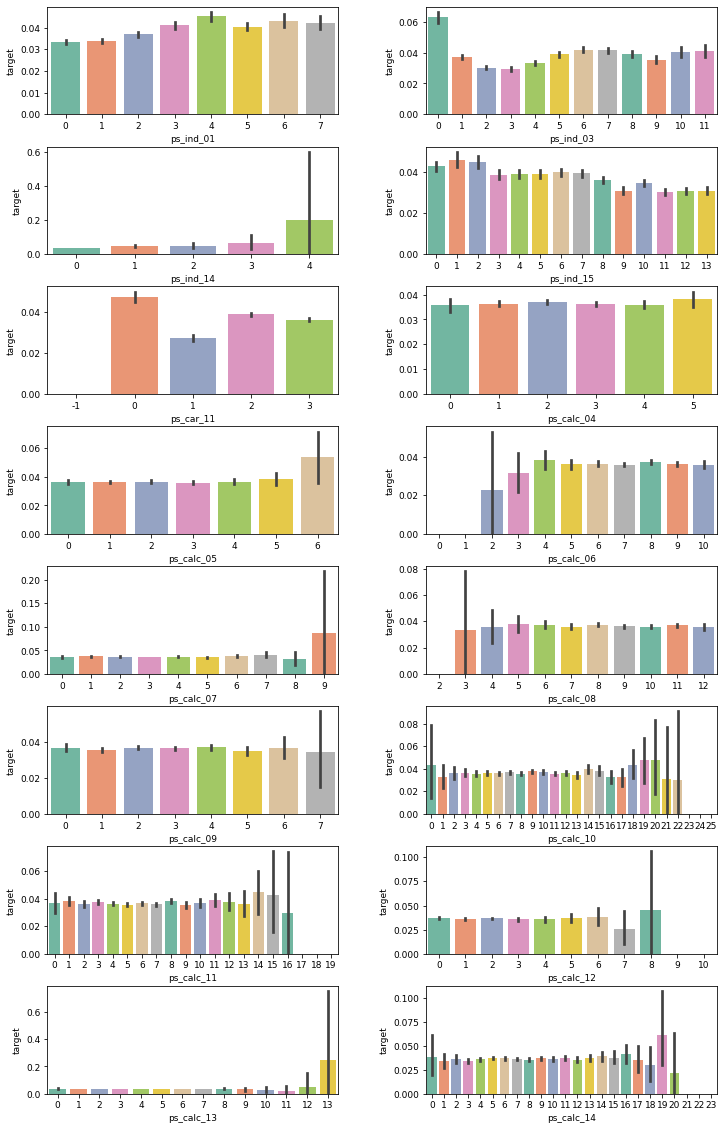

In [ ]:
#순서형 피처

ord_features = summary[summary['데이터 종류']=='순서형'].index
plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))

#ind_14의 경우 고윳값 4의 신뢰구간이 상당히 넓어 통계적 유효성이 떨어지는 것으로 판단. 피처 제거 예정
#calc_04~14는 모두 고윳값별 타깃값 비율이 비슷하나 신뢰구간이 넓어 통계적 유효성이 떨어짐. 제거 예정

In [ ]:
#연속형 피처

pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0], 3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

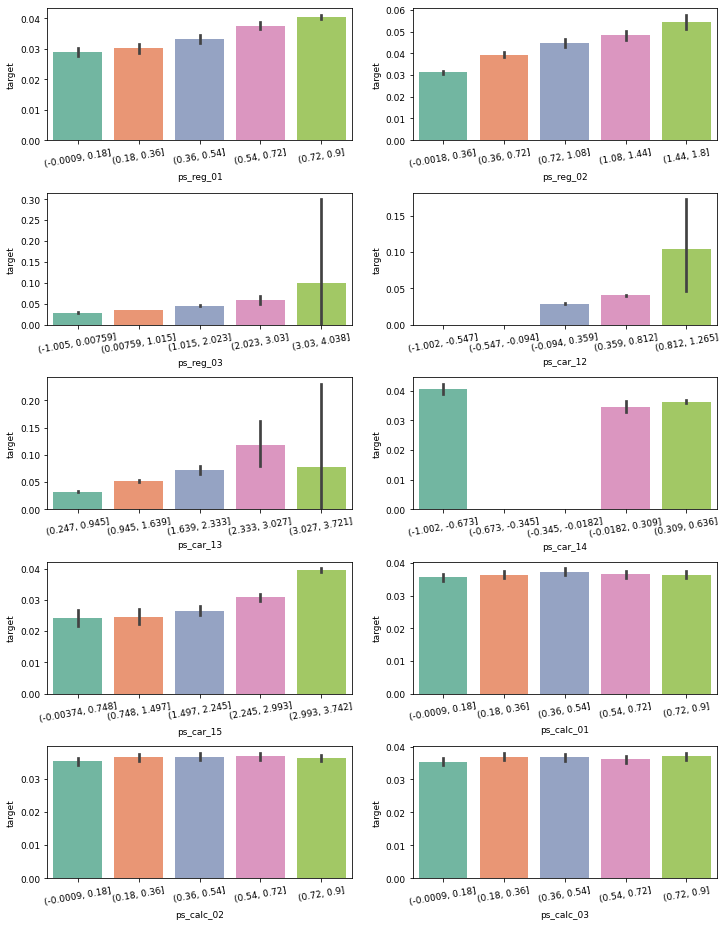

In [ ]:
cont_features = summary[summary['데이터 종류']=='연속형'].index

plt.figure(figsize=(12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
  train[cont_feature] = pd.cut(train[cont_feature], 5)
  ax = plt.subplot(grid[idx])
  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
  ax.tick_params(axis='x', labelrotation=10)

#calc_01~03의 경우 구간별 타깃값 비율 차이가 없어서 삭제해야 한다.

#지금까지의 결론 calc의 피처는 모두 제거해야 함

In [ ]:
#연속형 피처 간 상관관계 파악
#상관관계가 강한 피처들은 예측력이 비슷하기에 하나만 남겨두면 된다.

#결측값 먼저 제거하고 히트맵으로 나타내기
train_copy = train_copy.dropna()

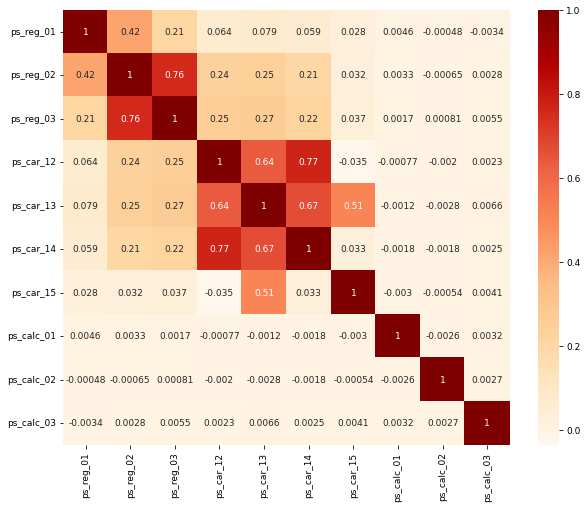

In [ ]:
plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd');

#car_12와 14가 가장 강한 상관관계를 보이나 테스트 결과 14 피처를 없애는 것이 성능을 더 좋게 만들었다.
#즉 그 다음으로 높은 0.76의 점수 reg_02와 03의 경우가 상관관계에 유효

베이스라인 모델(LightGBM)

In [ ]:
train = pd.read_csv('/content/train.csv', index_col='id')
test = pd.read_csv('/content/test.csv', index_col='id')
submission = pd.read_csv('/content/sample_submission.csv', index_col='id')

In [ ]:
#피처 엔지니어링

#데이터 합치기
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

In [ ]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [ ]:
#명목형 피처 원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

#결과에 열이 184개가 생긴 것을 확인

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [ ]:
#필요 없는 피처 제거
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and
                          'calc' not in feature and
                          feature not in drop_features)]

In [ ]:
#remaining_features를 encoded_cat_matrix와 결합
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format='csr')

In [ ]:
#데이터 나누기
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['target'].values

In [ ]:
#평가지표 계산 함수
#지니계수 반환.
import numpy as np

def eval_gini(y_true, y_pred):
  assert y_true.shape == y_pred.shape
  n_samples = y_true.shape[0]
  L_mid = np.linspace(1/n_samples, 1, n_samples)

  #예측값에 대한 지니계수
  pred_order = y_true[y_pred.argsort()]
  L_pred = np.cumsum(pred_order) / np.sum(pred_order)
  G_pred = np.sum(L_mid - L_pred)

  #예측이 완벽할 때 지니계수
  true_order = y_true[y_true.argsort()]
  L_true = np.cumsum(true_order) / np.sum(true_order)
  G_true = np.sum(L_mid - L_true)

  #정규화된 지니계수
  return G_pred / G_true

In [ ]:
def gini(preds, dtrain):
  labels = dtrain.get_label()
  return 'gini', eval_gini(labels, preds), True

In [ ]:
#모델 훈련 및 성능 검증
#OOF 예측 방식(훈련 데이터로 모델을 훈련, 검증 데이터로 모델 성능을 측정, 테스트 데이터로 최종 타깃 확률을 예측, 각 폴드별 모델로 여러번 예측하여 평균을 내는 방식)
#장점1 : 과대적합 방지 효과(훈련 시 접하지 못한 데이터로 성능을 평가하기 때문에 새로운 데이터에 일반화 성능이 어느 정도일지 가능하기 쉽다)
#장점2 : 앙상블 효과로 모델 성능이 좋아진다. K개 모델로 K번 예측해서 평균을 내는데 K번 예측해 평균한 확률이 한 번만 예측한 확률보다 일반적으로 더 정확하다 할 수 있다.

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [ ]:
params = {'objective':'binary',
          'learning_rate':0.01,
          'force_row_wise':True,
          'random_state':0}

In [ ]:
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

In [ ]:
#LightGBM 모델 훈련하면서 OOF 예측도 수행
import lightgbm as lgb
#oof방식
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
  #각 폴드를 구분하는 문구
  print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

  #훈련용 데이터, 검증용 데이터 설정
  X_train, y_train = X[train_idx], y[train_idx]
  X_valid, y_valid = X[valid_idx], y[valid_idx]

  #lightGBM 전용 데이터셋 생성
  dtrain = lgb.Dataset(X_train, y_train)
  dvalid = lgb.Dataset(X_valid, y_valid)

  #lightGBM 모델 훈련
  lgb_model = lgb.train(params=params,
                        train_set=dtrain,
                        num_boost_round=1000,
                        valid_sets=dvalid,
                        feval=gini,
                        early_stopping_rounds=100,
                        verbose_eval=100)
  
  #테스트 데이터를 활용한 oof 예측
  oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
  oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

  #검증 데이터 예측 확률에 대한 정규화 지니계수
  gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
  print(f'폴드: {idx+1} 지니계수: {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.15336	valid_0's gini: 0.261801
[200]	valid_0's binary_logloss: 0.152428	valid_0's gini: 0.275964
[300]	valid_0's binary_logloss: 0.152018	valid_0's gini: 0.282624
[400]	valid_0's binary_logloss: 0.151798	valid_0's gini: 0.286985
[500]	valid_0's binary_logloss: 0.151716	valid_0's gini: 0.288374
[600]	valid_0's binary_logloss: 0.151677	valid_0's gini: 0.288793
[700]	valid_0's binary_logloss: 0.151671	valid_0's gini: 0.288778
Early stopping, best iteration is:
[646]	valid_0's binary_logloss: 0.151673	valid_0's gini: 0.288887
폴드: 1 지니계수: 0.2888871820172969

######################################## 폴드 2 / 폴드 5 ########################################
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.153506	valid_0's gini: 0.249477
[200]	valid_0's binary_log

In [ ]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.2804880266267947


In [ ]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

## 성능 개선 : LightGBM 모델

In [ ]:
train = pd.read_csv('/content/train.csv', index_col='id')
test = pd.read_csv('/content/test.csv', index_col='id')
submission = pd.read_csv('/content/sample_submission.csv', index_col='id')

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

all_features = all_data.columns

In [ ]:
#명목형 피처 원핫인코딩
cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

In [ ]:
#데이터 하나당 결측값 개수를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [ ]:
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)]
remaining_features.append('num_missing')

In [ ]:
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
  if is_first_feature:
    all_data['mix_ind'] = all_data[ind_feature].astype(str)+'_'
    is_first_feature = False
  else:
    all_data['mix_ind'] += all_data[ind_feature].astype(str)+'_'

In [ ]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [ ]:
all_data['ps_ind_02_cat'].value_counts()

 1    1079327
 2     309747
 3      70172
 4      28259
-1        523
Name: ps_ind_02_cat, dtype: int64

In [ ]:
all_data['ps_ind_02_cat'].value_counts().to_dict()

{-1: 523, 1: 1079327, 2: 309747, 3: 70172, 4: 28259}

In [ ]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
  val_counts_dict = all_data[feature].value_counts().to_dict()
  all_data[f'{feature}_count']=all_data[feature].apply(lambda x:val_counts_dict[x])
  cat_count_features.append(f'{feature}_count')

In [ ]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [ ]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [ ]:
num_train = len(train)
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['target'].values

In [ ]:
#하이퍼 파라미터 최적화
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=0)
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [ ]:
param_bounds = {'num_leaves':(30,40),
                'lambda_l1':(0.7,0.9),
                'lambda_l2':(0.9,1),
                'feature_fraction':(0.6,0.7),
                'bagging_fraction':(0.6,0.9),
                'min_child_samples':(6,10),
                'min_child_weight':(10,40)}

fixed_params = {'objective':'binary',
                'learning_rate':0.005,
                'bagging_freq':1,
                'force_row_wise':True,
                'random_state':1991}                

In [ ]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction, bagging_fraction, min_child_samples, min_child_weight):
  params = {'num_leaves':int(round(num_leaves)),
            'lambda_l1':lambda_l1,
            'lambda_l2':lambda_l2,
            'feature_fraction':feature_fraction,
            'bagging_fraction':bagging_fraction,
            'min_child_samples':int(round(min_child_samples)),
            'min_child_weight':min_child_weight,
            'feature_pre_filter':False}
  params.update(fixed_params)

  print('하이퍼파라미터:', params)

  lgb_model = lgb.train(params=params,
                        train_set=bayes_dtrain,
                        num_boost_round=2500,
                        valid_sets=bayes_dvalid,
                        feval=gini,
                        early_stopping_rounds=300,
                        verbose_eval=False)
  preds = lgb_model.predict(X_valid)
  gini_score = eval_gini(y_valid, preds)
  print(f'지니계수 : {gini_score}\n')

  return gini_score

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=9d28296cf32fca8a2db41922ac5f8c196a0b220b294a4e2eb730024b8ac60a32
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
지니계수 : 0.2846778857441302

|  1        |  0.2847   |  0.7646   |  0.6715   |  0.8206   |  0.9545   |  7.695    |  29.38    |  34.38    |
하이퍼파라미터: {'num_leaves': 39, 'lambda_l1': 0.7766883037651555, 'lambda_l2': 0.9791725038082665, 'feature_fraction': 0.6963662760501029, 'bagging_fraction': 0.867531900234624, 'min_child_samples': 8, 'min_child_weight': 27.04133683281797, 'feature_pre_filter': False,

In [ ]:
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.6,
 'feature_fraction': 0.6,
 'lambda_l1': 0.9,
 'lambda_l2': 0.9159110552679353,
 'min_child_samples': 6.0,
 'min_child_weight': 35.14591174568853,
 'num_leaves': 40.0}

In [ ]:
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [ ]:
max_params.update(fixed_params)

In [ ]:
max_params

{'bagging_fraction': 0.6,
 'bagging_freq': 1,
 'feature_fraction': 0.6,
 'force_row_wise': True,
 'lambda_l1': 0.9,
 'lambda_l2': 0.9159110552679353,
 'learning_rate': 0.005,
 'min_child_samples': 6,
 'min_child_weight': 35.14591174568853,
 'num_leaves': 40,
 'objective': 'binary',
 'random_state': 1991}

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
  print('#'*20, f'폴드 {idx+1}/폴드 {folds.n_splits}', '#'*20)

  X_train, y_train = X[train_idx], y[train_idx]
  X_valid, y_valid = X[valid_idx], y[valid_idx]

  dtrain = lgb.Dataset(X_train, y_train)
  dvalid = lgb.Dataset(X_valid, y_valid)

  lgb_model = lgb.train(params=max_params,
                        train_set=dtrain,
                        num_boost_round=2500,
                        valid_sets=dvalid,
                        feval=gini,
                        early_stopping_rounds=300,
                        verbose_eval=100)
  
  oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
  oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

  gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
  print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

#################### 폴드 1/폴드 5 ####################
Training until validation scores don't improve for 300 rounds.
[100]	valid_0's binary_logloss: 0.154268	valid_0's gini: 0.269399
[200]	valid_0's binary_logloss: 0.153181	valid_0's gini: 0.275843
[300]	valid_0's binary_logloss: 0.152576	valid_0's gini: 0.280498
[400]	valid_0's binary_logloss: 0.152218	valid_0's gini: 0.28355
[500]	valid_0's binary_logloss: 0.151979	valid_0's gini: 0.286622
[600]	valid_0's binary_logloss: 0.151816	valid_0's gini: 0.289257
[700]	valid_0's binary_logloss: 0.151701	valid_0's gini: 0.291343
[800]	valid_0's binary_logloss: 0.151617	valid_0's gini: 0.292899
[900]	valid_0's binary_logloss: 0.151549	valid_0's gini: 0.294374
[1000]	valid_0's binary_logloss: 0.151498	valid_0's gini: 0.295459
[1100]	valid_0's binary_logloss: 0.151457	valid_0's gini: 0.296364
[1200]	valid_0's binary_logloss: 0.151423	valid_0's gini: 0.29724
[1300]	valid_0's binary_logloss: 0.1514	valid_0's gini: 0.297733
[1400]	valid_0's binary_log

In [ ]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 : 0.28893480760807283


In [ ]:
submission['target'] = oof_test_preds
submission.to_csv('submission_1.csv')